<a href="https://colab.research.google.com/github/keripikkaneboo/Machine-Learning/blob/main/UAS/Classification/Classification%231.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!gdown 1au6HqbGWpBCszFFBjZ4YmdpnqhThnTlU

Downloading...
From (original): https://drive.google.com/uc?id=1au6HqbGWpBCszFFBjZ4YmdpnqhThnTlU
From (redirected): https://drive.google.com/uc?id=1au6HqbGWpBCszFFBjZ4YmdpnqhThnTlU&confirm=t&uuid=0b3e9040-1c37-407a-aee4-a1ecd2b1d0bc
To: /content/KlasifikasiUTS.csv
100% 151M/151M [00:03<00:00, 47.4MB/s]


In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt


# Load dataset
df = pd.read_csv("/content/KlasifikasiUTS.csv")

# Tentukan target (kolom integer pertama)
target_col = df.select_dtypes(include='int').columns[0]
y = df[target_col]
X = df.drop(columns=[target_col])

# Pembersihan awal
X = X.dropna(axis=1, how='all')
X = X.ffill()



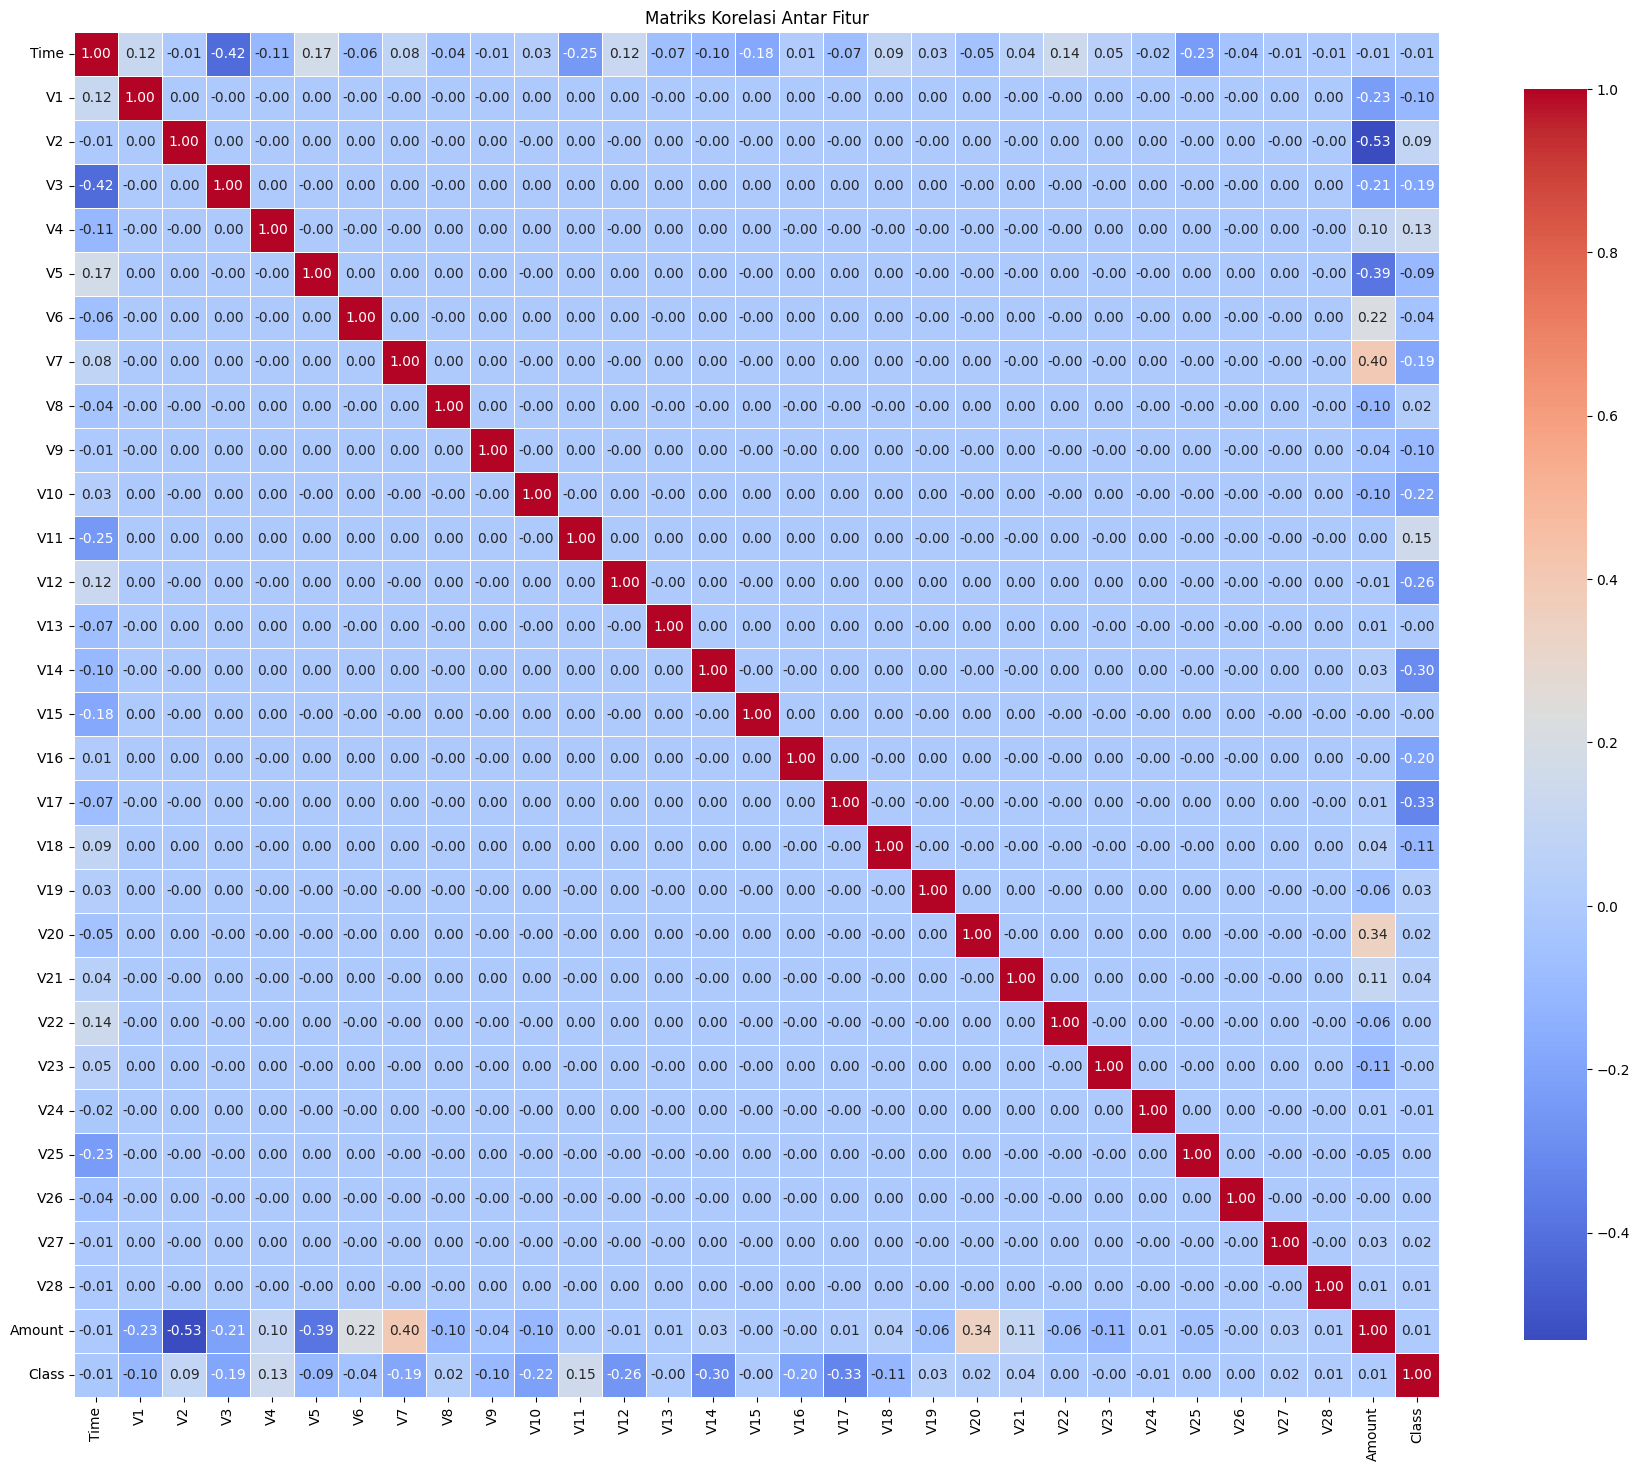

In [9]:
plt.figure(figsize=(18, 16))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True,
            linewidths=0.5, cbar_kws={"shrink": .8})
plt.title("Matriks Korelasi Antar Fitur")
plt.tight_layout()
plt.show()

# TesnorFlow

In [10]:
# Identifikasi tipe fitur
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

# Preprocessing pipelines
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Gabungkan preprocessor
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

# Transform fitur
X_processed = preprocessor.fit_transform(X)

# Normalisasi target
y_scaler = MinMaxScaler()
y_scaled = y_scaler.fit_transform(y.values.reshape(-1, 1)).flatten()

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_processed, y_scaled, test_size=0.2, random_state=42)


In [18]:
import tensorflow as tf
from tensorflow.keras import layers, callbacks, optimizers, regularizers

model_tf = tf.keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(1, activation='sigmoid')  # Klasifikasi biner
])

model_tf.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy', 'Precision', 'Recall', 'AUC']
)


# Early stopping
early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Training
history = model_tf.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

# Prediksi dan inverse transform
y_pred_scaled = model_tf.predict(X_test).flatten()
y_pred = y_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
y_true = y_scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()


Epoch 1/100
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 54s 7ms/step - AUC: 0.8699 - Precision: 0.0971 - Recall: 0.6168 - accuracy: 0.9739 - loss: 0.0794 - val_AUC: 0.9485 - val_Precision: 0.7333 - val_Recall: 0.7857 - val_accuracy: 0.9991 - val_loss: 0.0083
Epoch 2/100
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 77s 6ms/step - AUC: 0.9305 - Precision: 0.8635 - Recall: 0.7150 - accuracy: 0.9993 - loss: 0.0038 - val_AUC: 0.9536 - val_Precision: 0.7117 - val_Recall: 0.8061 - val_accuracy: 0.9991 - val_loss: 0.0106
Epoch 3/100
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 83s 7ms/step - AUC: 0.9245 - Precision: 0.8417 - Recall: 0.7080 - accuracy: 0.9993 - loss: 0.0036 - val_AUC: 0.9535 - val_Precision: 0.7596 - val_Recall: 0.8061 - val_accuracy: 0.9992 - val_loss: 0.0097
Epoch 4/100
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 85s 7ms/step - AUC: 0.9292 - Precision: 0.8368 - Recall: 0.7190 - accuracy: 0.9993 - loss: 0.0033 - val_AUC: 0.9536 - val_Precision: 0.7500 - val_Recall: 0.8265 - val_accuracy: 0.9992 - val_loss: 0.0085
Epoch 5/100
7121

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
=== Classification Report ===
              precision    recall  f1-score   support

         0.0     0.9997    0.9997    0.9997     56864
         1.0     0.8144    0.8061    0.8103        98

    accuracy                         0.9994     56962
   macro avg     0.9070    0.9029    0.9050     56962
weighted avg     0.9993    0.9994    0.9993     56962



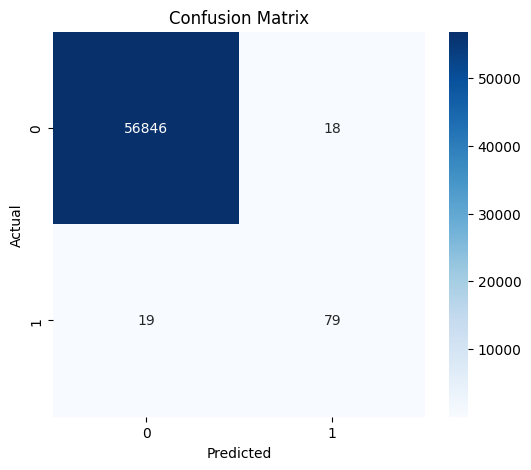

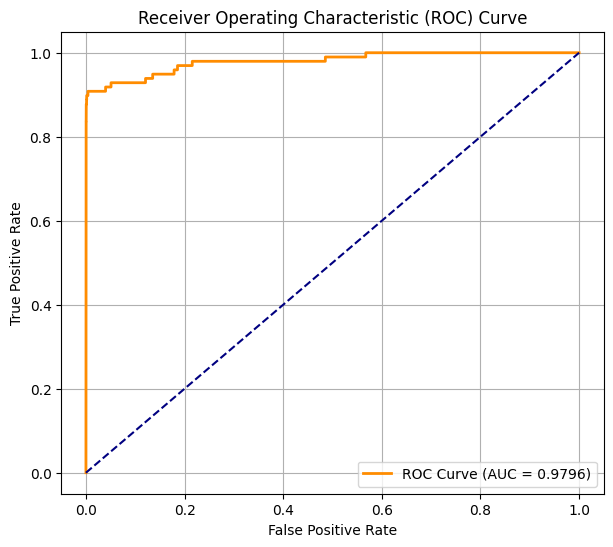

In [19]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
# Prediksi probabilitas dan label
y_pred_probs = model_tf.predict(X_test).flatten()
y_pred_labels = (y_pred_probs > 0.5).astype(int)

# Evaluasi
print("=== Classification Report ===")
print(classification_report(y_test, y_pred_labels, digits=4))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_labels)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC Curve (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Torch

In [21]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

In [22]:
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

X_processed = preprocessor.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Konversi ke tensor
X_train_tensor = torch.tensor(X_train.toarray() if hasattr(X_train, "toarray") else X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test.toarray() if hasattr(X_test, "toarray") else X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)

In [23]:
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [24]:
class ClassificationNN(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.BatchNorm1d(64),
            nn.Dropout(0.2),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.BatchNorm1d(32),
            nn.Linear(32, 1),
            nn.Sigmoid()  # aktivasi untuk binary classification
        )

    def forward(self, x):
        return self.model(x)

model = ClassificationNN(X_train_tensor.shape[1])
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


In [25]:
def train_model(model, loader, criterion, optimizer, epochs=50):
    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        for X_batch, y_batch in loader:
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(loader):.4f}")

train_model(model, train_loader, criterion, optimizer)


Epoch 1/50, Loss: 0.0217
Epoch 2/50, Loss: 0.0034
Epoch 3/50, Loss: 0.0032
Epoch 4/50, Loss: 0.0030
Epoch 5/50, Loss: 0.0028
Epoch 6/50, Loss: 0.0029
Epoch 7/50, Loss: 0.0027
Epoch 8/50, Loss: 0.0026
Epoch 9/50, Loss: 0.0026
Epoch 10/50, Loss: 0.0027
Epoch 11/50, Loss: 0.0025
Epoch 12/50, Loss: 0.0023
Epoch 13/50, Loss: 0.0023
Epoch 14/50, Loss: 0.0023
Epoch 15/50, Loss: 0.0023
Epoch 16/50, Loss: 0.0022
Epoch 17/50, Loss: 0.0021
Epoch 18/50, Loss: 0.0021
Epoch 19/50, Loss: 0.0022
Epoch 20/50, Loss: 0.0021
Epoch 21/50, Loss: 0.0020
Epoch 22/50, Loss: 0.0020
Epoch 23/50, Loss: 0.0020
Epoch 24/50, Loss: 0.0020
Epoch 25/50, Loss: 0.0019
Epoch 26/50, Loss: 0.0019
Epoch 27/50, Loss: 0.0020
Epoch 28/50, Loss: 0.0020
Epoch 29/50, Loss: 0.0020
Epoch 30/50, Loss: 0.0019
Epoch 31/50, Loss: 0.0017
Epoch 32/50, Loss: 0.0019
Epoch 33/50, Loss: 0.0017
Epoch 34/50, Loss: 0.0018
Epoch 35/50, Loss: 0.0018
Epoch 36/50, Loss: 0.0018
Epoch 37/50, Loss: 0.0019
Epoch 38/50, Loss: 0.0017
Epoch 39/50, Loss: 0.

=== Classification Report ===
              precision    recall  f1-score   support

           0     0.9997    0.9997    0.9997     56864
           1     0.8100    0.8265    0.8182        98

    accuracy                         0.9994     56962
   macro avg     0.9049    0.9131    0.9089     56962
weighted avg     0.9994    0.9994    0.9994     56962



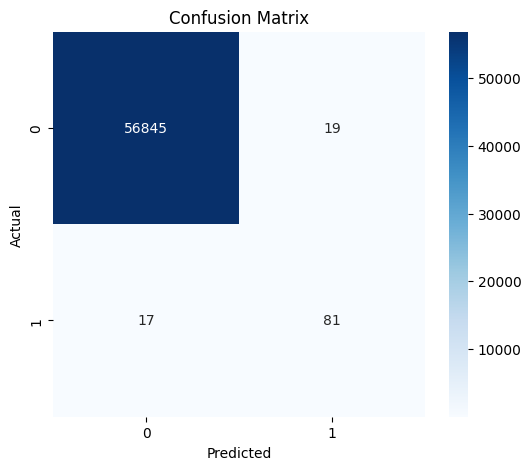

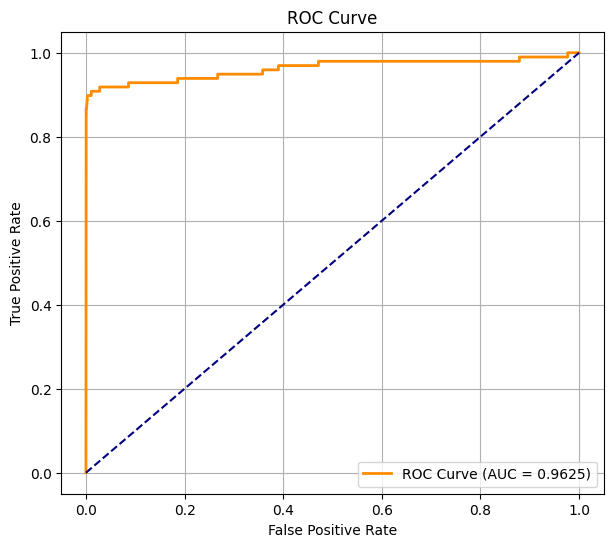

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, classification_report
model.eval()
with torch.no_grad():
    y_probs = model(X_test_tensor).numpy().flatten()
    y_pred = (y_probs >= 0.5).astype(int)
    y_true = y_test_tensor.numpy().flatten().astype(int)

# Metrik Evaluasi
print("=== Classification Report ===")
print(classification_report(y_true, y_pred, digits=4))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve & AUC
fpr, tpr, thresholds = roc_curve(y_true, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC Curve (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Penjelasan Model

---

## **1. TensorFlow Regression Model (Dense untuk MSE)**

###  Ciri:

* Output layer: `Dense(1)` tanpa aktivasi
* Loss function: `Mean Squared Error (MSE)`
* Target dianggap sebagai nilai kontinu, bukan klasifikasi

###  Kekurangan:

* Tidak cocok untuk **klasifikasi biner (0/1)** karena prediksi berupa angka kontinu, bukan probabilitas atau kelas.
* Hasilnya:

  * **R² score negatif** → model lebih buruk dari tebakan rata-rata
  * Plot menunjukkan overfitting dan prediksi melenceng

###  Kapan cocok?

* Jika target berupa **regresi kontinu** (misalnya prediksi suhu, harga).

---

##  **2. PyTorch Regression Model (MSE + Linear Output)**

###  Ciri:

* Sama seperti versi TensorFlow: regresi
* Output: `Linear`, tanpa aktivasi
* Loss: `MSELoss()`

###  Kekurangan:

* Lagi-lagi, tidak cocok untuk klasifikasi biner
* Tidak bisa membedakan probabilitas 0/1

---

##  **3. PyTorch Classification Model (Sigmoid + BCELoss)**

###  Ciri:

* Output: `Sigmoid()` → hasil antara 0 dan 1
* Loss: `BCELoss()` untuk binary classification
* Prediksi dibuat threshold ≥ 0.5 → kelas 1, else kelas 0
* Evaluasi lengkap dengan:

  * Akurasi
  * Precision
  * Recall
  * F1-Score
  * Confusion Matrix
  * ROC Curve & AUC

###  Kelebihan:

* **Paling cocok** untuk tugas klasifikasi 0/1
* Metrik evaluasi menunjukkan *seberapa baik model membedakan kelas*
* AUC mengukur **kemampuan model membedakan positif vs negatif**

---

##  **Metrik Evaluasi yang Harus Kamu Gunakan**

Misal kamu dapat output seperti ini:

```plaintext
Accuracy:     0.92
Precision:    0.89
Recall:       0.86
F1 Score:     0.87
AUC:          0.93
```

### Penjelasan:

* **Accuracy**: proporsi benar dari total prediksi
* **Precision**: dari semua prediksi positif, berapa yang benar
* **Recall**: dari semua kasus positif, berapa yang berhasil ditemukan
* **F1 Score**: rata-rata harmonis dari precision & recall
* **AUC**: seberapa baik model membedakan 0 dan 1 di semua threshold

---

##  **Kesimpulan: Model Terbaik**

> **Model Terbaik: PyTorch Classification Model dengan Sigmoid + BCELoss**

### Mengapa?

* Paling sesuai untuk klasifikasi biner
* Memberi probabilitas → bisa dikalibrasi & threshold diatur
* Bisa dinilai dengan metrik seperti precision, recall, AUC
* Tidak melakukan regresi terhadap data yang sebenarnya diskrit

---